In [6]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [14]:
import graphufs
plt.style.use("graphufs.plotstyle")

/home/tsmith/work/graph-ufs/graphufs/training.py:59: UserWarning: Import failed for either mpi4py or mpi4jax.
  warnings.warn("Import failed for either mpi4py or mpi4jax.")


In [9]:
dsdict = {}

for batch_size in [2, 4, 8, 16]:
    dsdict[batch_size] = xr.open_dataset(f"test-batch-{batch_size:02d}/loss.nc")

In [11]:
xds.epoch_label

<xarray.DataArray 'epoch_label' (optim_step: 40)> Size: 320B
[40 values with dtype=float64]
Coordinates:
  * optim_step  (optim_step) int64 320B 0 1 2 3 4 5 6 7 ... 33 34 35 36 37 38 39

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


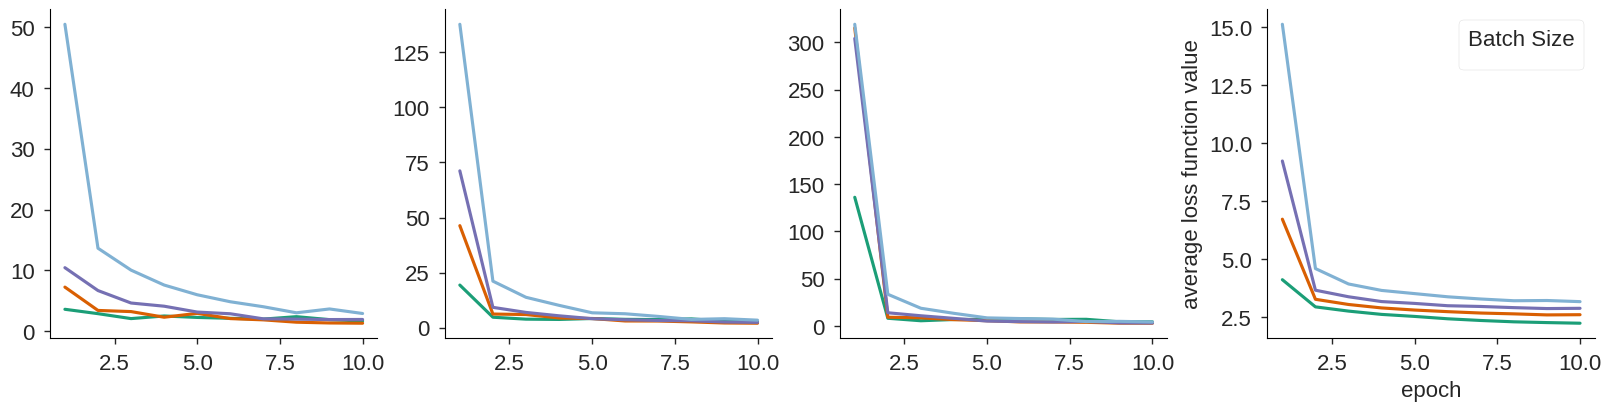

In [18]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4), constrained_layout=True)

for idx, (batch_size, xds) in enumerate(dsdict.items()):
    ggroup = xds.g_norm.groupby(xds.epoch_label)
    #plt.fill_between(x=xds.epoch, y1=ggroup.min(), y2=ggroup.max(), color=f"C{idx}", alpha=.3)
    for plotme, ax in zip(
        [ggroup.min(), ggroup.mean(), ggroup.max()],
        axs,
    ):
        ax.plot(xds.epoch, plotme, color=f"C{idx}", label=batch_size)
    xds.loss_avg.plot(ax=axs[-1])
axs[-1].legend(title="Batch Size")

In [33]:
clipdict = {}

for batch_size in [2, 4, 8, 16]:
    clipdict[batch_size] = xr.open_dataset(f"clipby-batch-{batch_size:02d}/loss.nc")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


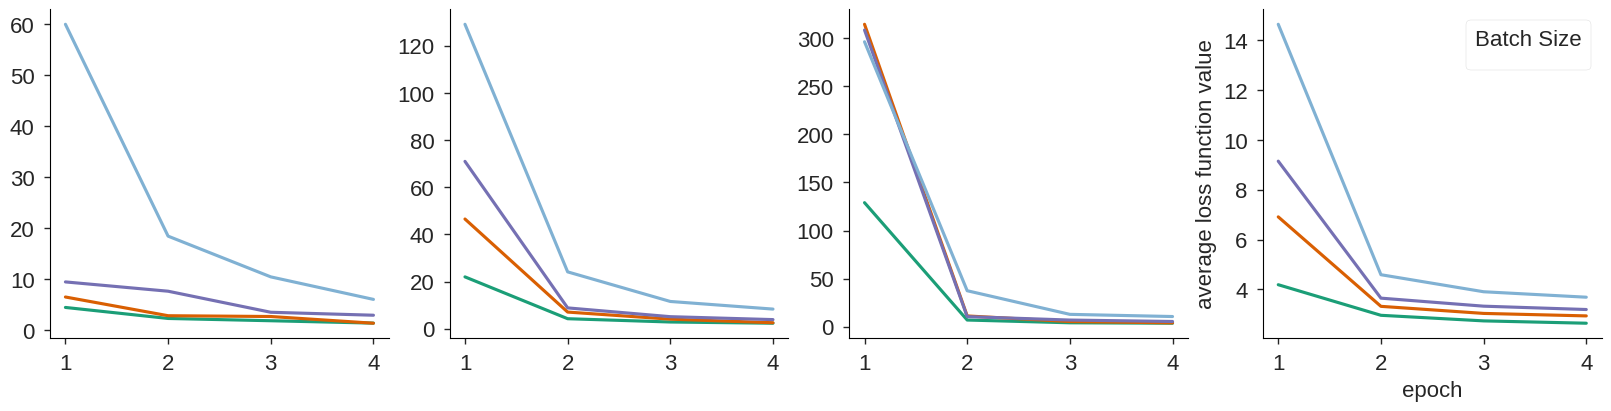

In [34]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4), constrained_layout=True)

for idx, (batch_size, xds) in enumerate(clipdict.items()):
    ggroup = xds.g_norm.groupby(xds.epoch_label)
    for plotme, label, ax in zip(
        [ggroup.min(), ggroup.mean(), ggroup.max()],
        ["min g_norm", "mean g_norm", "max g_norm"],
        axs,
    ):
        ax.plot(xds.epoch, plotme, color=f"C{idx}", label=batch_size)
    xds.loss_avg.plot(ax=axs[-1])
axs[-1].legend(title="Batch Size")

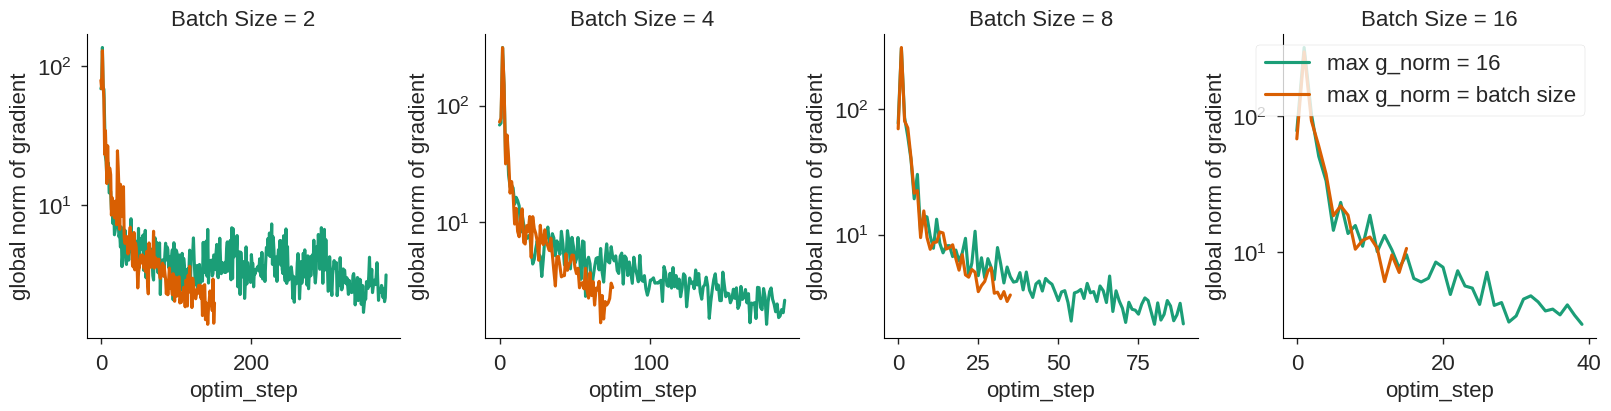

In [35]:
fig, axs = plt.subplots(1, len(clipdict), figsize=(16, 4), constrained_layout=True)

for (batch_size, xds1), (_, xds2), ax in zip(dsdict.items(), clipdict.items(), axs):
    xds1.g_norm.plot(yscale="log", ax=ax, label="max g_norm = 16")
    xds2.g_norm.plot(ax=ax, label="max g_norm = batch size")
    ax.set(title=f"Batch Size = {batch_size}")
axs[-1].legend() 

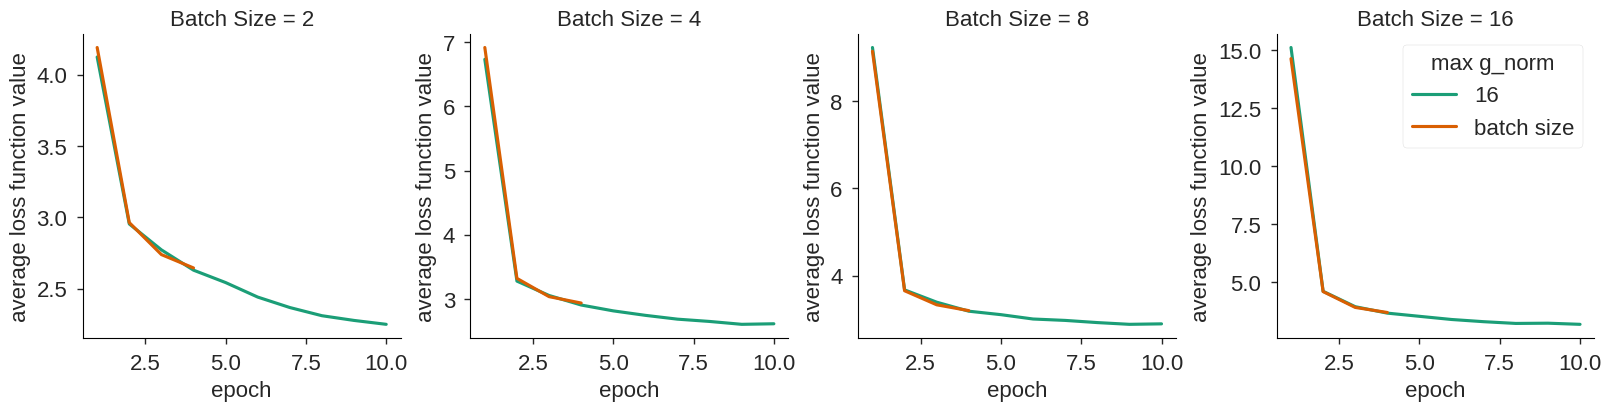

In [37]:
fig, axs = plt.subplots(1, len(clipdict), figsize=(16, 4), constrained_layout=True)

for (batch_size, xds1), (_, xds2), ax in zip(dsdict.items(), clipdict.items(), axs):
    xds1.loss_avg.plot(ax=ax, label="16")
    xds2.loss_avg.plot(ax=ax, label="batch size")
    ax.set(title=f"Batch Size = {batch_size}")
axs[-1].legend(title = "max g_norm") 